In [1]:
import numpy as np
import keras
import os
import matplotlib.pyplot as plt
import cv2
from PIL import Image, ImageDraw, ImageFont
from scipy.ndimage import zoom
import re
import math
import pickle
import sys

2023-07-25 20:41:22.288980: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-07-25 20:41:25.105727: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [849]:
model = keras.models.load_model(MODEL_PATH)

In [981]:
COLUMN_NUM = 20
# COLUMN_NUM = 100
MODEL_PATH = "inceptionv3_model_and_weights.keras"
# IMAGE_PATH = "/home/wuming/Documents/abstract-meme/test_images/test 05.png"
IMAGE_PATH = "/home/wuming/Documents/abstract-meme/test_images/test 01.png"
STANDARD_FONT = 'standard-font.ttf'
STANDARD_FONT = '/home/wuming/Documents/abstract-meme/database/fonts/cores/PingFang-Fonts/PingFang Regular.ttf'
IMAGE_WIDTH = 500
IMAGE_HEIGHT = 500
# IMAGE_WIDTH = 2000
# IMAGE_HEIGHT = 2000
FONT_SIZE = 20
TEXT_POSITION = (20,20)
DIR_DICT_PATH = "dir_dict.original.pkl"
DIR_DICT_REVERSED_PATH = "dir_dict_reversed.original.pkl"

In [982]:
with open(DIR_DICT_PATH, "rb") as file:
    dir_dict = pickle.load(file)

In [983]:
with open(DIR_DICT_REVERSED_PATH, "rb") as file:
    dir_dict_reversed = pickle.load(file)

In [984]:
num_dirs = sys.getsizeof(dir_dict)

In [985]:
num_dirs

4696

In [986]:
dir_dict

{'100_0x64': 0,
 '101_0x65': 1,
 '102_0x66': 2,
 '103_0x67': 3,
 '104_0x68': 4,
 '105_0x69': 5,
 '106_0x6a': 6,
 '107_0x6b': 7,
 '108_0x6c': 8,
 '109_0x6d': 9,
 '110_0x6e': 10,
 '111_0x6f': 11,
 '112_0x70': 12,
 '113_0x71': 13,
 '114_0x72': 14,
 '115_0x73': 15,
 '116_0x74': 16,
 '117_0x75': 17,
 '118_0x76': 18,
 '119_0x77': 19,
 '120_0x78': 20,
 '121_0x79': 21,
 '122_0x7a': 22,
 '123_0x7b': 23,
 '124_0x7c': 24,
 '125_0x7d': 25,
 '126_0x7e': 26,
 '32_0x20': 27,
 '33_0x21': 28,
 '34_0x22': 29,
 '35_0x23': 30,
 '36_0x24': 31,
 '37_0x25': 32,
 '38_0x26': 33,
 '39_0x27': 34,
 '40_0x28': 35,
 '41_0x29': 36,
 '42_0x2a': 37,
 '43_0x2b': 38,
 '44_0x2c': 39,
 '45_0x2d': 40,
 '46_0x2e': 41,
 '47_0x2f': 42,
 '48_0x30': 43,
 '49_0x31': 44,
 '50_0x32': 45,
 '51_0x33': 46,
 '52_0x34': 47,
 '53_0x35': 48,
 '54_0x36': 49,
 '55_0x37': 50,
 '56_0x38': 51,
 '57_0x39': 52,
 '58_0x3a': 53,
 '59_0x3b': 54,
 '60_0x3c': 55,
 '61_0x3d': 56,
 '62_0x3e': 57,
 '63_0x3f': 58,
 '64_0x40': 59,
 '65_0x41': 60,
 '66_0x

In [987]:
dir_dict_reversed

{0: '100_0x64',
 1: '101_0x65',
 2: '102_0x66',
 3: '103_0x67',
 4: '104_0x68',
 5: '105_0x69',
 6: '106_0x6a',
 7: '107_0x6b',
 8: '108_0x6c',
 9: '109_0x6d',
 10: '110_0x6e',
 11: '111_0x6f',
 12: '112_0x70',
 13: '113_0x71',
 14: '114_0x72',
 15: '115_0x73',
 16: '116_0x74',
 17: '117_0x75',
 18: '118_0x76',
 19: '119_0x77',
 20: '120_0x78',
 21: '121_0x79',
 22: '122_0x7a',
 23: '123_0x7b',
 24: '124_0x7c',
 25: '125_0x7d',
 26: '126_0x7e',
 27: '32_0x20',
 28: '33_0x21',
 29: '34_0x22',
 30: '35_0x23',
 31: '36_0x24',
 32: '37_0x25',
 33: '38_0x26',
 34: '39_0x27',
 35: '40_0x28',
 36: '41_0x29',
 37: '42_0x2a',
 38: '43_0x2b',
 39: '44_0x2c',
 40: '45_0x2d',
 41: '46_0x2e',
 42: '47_0x2f',
 43: '48_0x30',
 44: '49_0x31',
 45: '50_0x32',
 46: '51_0x33',
 47: '52_0x34',
 48: '53_0x35',
 49: '54_0x36',
 50: '55_0x37',
 51: '56_0x38',
 52: '57_0x39',
 53: '58_0x3a',
 54: '59_0x3b',
 55: '60_0x3c',
 56: '61_0x3d',
 57: '62_0x3e',
 58: '63_0x3f',
 59: '64_0x40',
 60: '65_0x41',
 61: '6

In [988]:
full_image = cv2.imread(IMAGE_PATH, cv2.IMREAD_GRAYSCALE)

In [989]:
full_array = np.asarray(full_image)

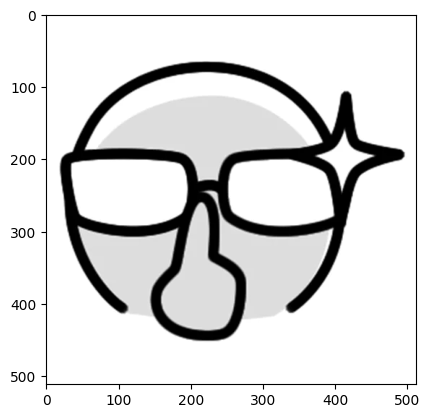

In [990]:
plt.imshow(full_array, cmap="gray")

In [991]:
full_array.shape

(512, 512)

In [992]:
BLOCK_SIZE = (math.ceil(full_array.shape[0] / COLUMN_NUM), math.ceil(full_array.shape[0] / COLUMN_NUM))
ROW_NUM = math.floor(full_array.shape[1] / BLOCK_SIZE[1])

In [993]:
BLOCK_SIZE

(6, 6)

In [994]:
ROW_NUM

85

In [995]:
COLUMN_NUM

100

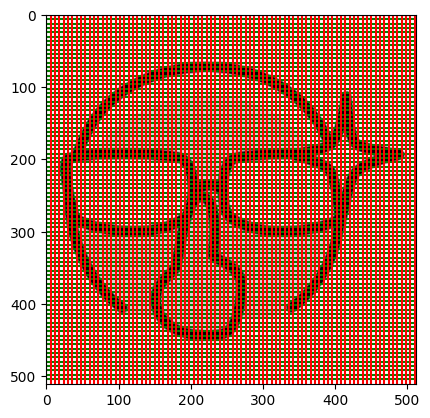

In [996]:
for i in range(ROW_NUM):
    plt.axhline(y=i*BLOCK_SIZE[1], color='green')
for i in range(COLUMN_NUM):
    plt.axvline(x=i*BLOCK_SIZE[0], color='red')
plt.imshow(full_array, cmap="gray")

In [997]:
full_array.shape

(512, 512)

In [998]:
part_array = np.zeros((COLUMN_NUM, ROW_NUM, BLOCK_SIZE[0], BLOCK_SIZE[1]), dtype=full_array.dtype)
part_array.shape

(100, 85, 6, 6)

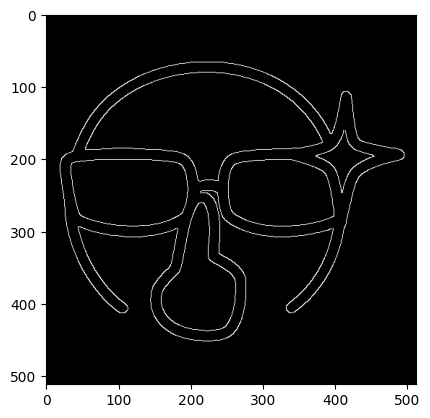

In [999]:
full_array = cv2.GaussianBlur(full_array, (3,3), 0)
full_array = cv2.Canny(full_array, 5, 300)
full_array = np.asarray(full_array)
plt.imshow(full_array, cmap="gray")

In [1000]:
max_x = max(BLOCK_SIZE[0]*ROW_NUM, full_array.shape[0])
max_y = max(BLOCK_SIZE[1]*COLUMN_NUM, full_array.shape[1])
tmp_refit_matrix = np.zeros((max_x, max_y))
tmp_refit_matrix[:full_array.shape[0],:full_array.shape[1]] = full_array
full_array = tmp_refit_matrix.copy()

In [1001]:
for i in range(COLUMN_NUM):
    for j in range(ROW_NUM):
        tmp_part_array = full_array[i*BLOCK_SIZE[0]:(i+1)*BLOCK_SIZE[0], j*BLOCK_SIZE[1]:(j+1)*BLOCK_SIZE[1]]
        if tmp_part_array.shape != BLOCK_SIZE:
            tmp_part_array_new = np.zeros(BLOCK_SIZE)
            tmp_part_array_new[:tmp_part_array.shape[0],:tmp_part_array.shape[1]] = tmp_part_array
            tmp_part_array = tmp_part_array_new.copy()
        part_array[i,j] = tmp_part_array

In [1002]:
# for i in range(part_array.shape[0]):
#     for j in range(part_array.shape[1]):
#         tmp_array = part_array[i][j].copy()
#         # tmp_cv2 = cv2.cvtColor(tmp_array,cv2.COLOR_BGR2GRAY)
#         tmp_cv2 = tmp_array
#         tmp_cv2 = cv2.GaussianBlur(tmp_cv2, (3,3),0)
#         tmp_cv2 = cv2.Canny(tmp_cv2, 5,300)
#         tmp_array_new = np.asarray(tmp_cv2)
#         part_array[i][j] = tmp_array_new

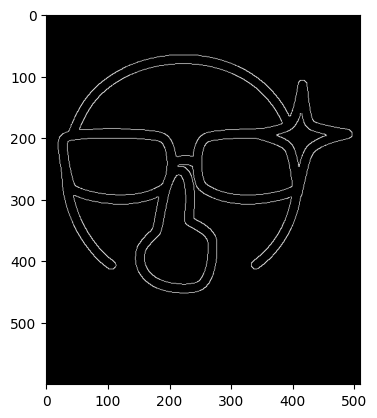

In [1003]:
tmp_check = np.empty((part_array.shape[0]*part_array.shape[2], part_array.shape[1]*part_array.shape[3]))
for i in range(part_array.shape[0]):
    for j in range(part_array.shape[1]):
        tmp_check[i*BLOCK_SIZE[0]:(i+1)*BLOCK_SIZE[0], j*BLOCK_SIZE[1]:(j+1)*BLOCK_SIZE[1]] = part_array[i,j]
plt.imshow(tmp_check,cmap="gray")

In [1004]:
part_array_new = np.empty((COLUMN_NUM, ROW_NUM,100,100), dtype=full_array.dtype)

In [1005]:
zoom_factor = 100 / BLOCK_SIZE[0]
for i in range(part_array.shape[0]):
    for j in range(part_array.shape[1]):
        tmp_array = part_array[i,j,:,:].copy()
        zoomed_image = zoom(tmp_array, zoom_factor, order = 3, mode = "wrap")
        zoomed_image = np.clip(zoomed_image, 0, 255).astype(np.uint8)
        part_array_new[i][j] = zoomed_image

In [1006]:
# plt.imshow(part_array_new[20,4],cmap="gray")

In [1007]:
part_array_new.shape

(100, 85, 100, 100)

In [1008]:
part_array_prepare = np.empty((part_array_new.shape[0]*part_array_new.shape[1],part_array_new.shape[2], part_array_new.shape[3]))
for i in range(part_array_new.shape[0]):
    for j in range(part_array_new.shape[1]):
        print(i,j,i*COLUMN_NUM+j)
        part_array_prepare[j*COLUMN_NUM+i] = part_array_new[i,j]

0 0 0
0 1 1
0 2 2
0 3 3
0 4 4
0 5 5
0 6 6
0 7 7
0 8 8
0 9 9
0 10 10
0 11 11
0 12 12
0 13 13
0 14 14
0 15 15
0 16 16
0 17 17
0 18 18
0 19 19
0 20 20
0 21 21
0 22 22
0 23 23
0 24 24
0 25 25
0 26 26
0 27 27
0 28 28
0 29 29
0 30 30
0 31 31
0 32 32
0 33 33
0 34 34
0 35 35
0 36 36
0 37 37
0 38 38
0 39 39
0 40 40
0 41 41
0 42 42
0 43 43
0 44 44
0 45 45
0 46 46
0 47 47
0 48 48
0 49 49
0 50 50
0 51 51
0 52 52
0 53 53
0 54 54
0 55 55
0 56 56
0 57 57
0 58 58
0 59 59
0 60 60
0 61 61
0 62 62
0 63 63
0 64 64
0 65 65
0 66 66
0 67 67
0 68 68
0 69 69
0 70 70
0 71 71
0 72 72
0 73 73
0 74 74
0 75 75
0 76 76
0 77 77
0 78 78
0 79 79
0 80 80
0 81 81
0 82 82
0 83 83
0 84 84
1 0 100
1 1 101
1 2 102
1 3 103
1 4 104
1 5 105
1 6 106
1 7 107
1 8 108
1 9 109
1 10 110
1 11 111
1 12 112
1 13 113
1 14 114
1 15 115
1 16 116
1 17 117
1 18 118
1 19 119
1 20 120
1 21 121
1 22 122
1 23 123
1 24 124
1 25 125
1 26 126
1 27 127
1 28 128
1 29 129
1 30 130
1 31 131
1 32 132
1 33 133
1 34 134
1 35 135
1 36 136
1 37 137
1 38 138

In [1009]:
part_array_prepare.shape

(8500, 100, 100)

In [1010]:
# plt.imshow(part_array_prepare[20*20+4],cmap='gray')

In [1011]:
part_array_prepare_last = np.expand_dims(part_array_prepare, axis=-1)

In [1012]:
part_array_prepare_last.shape

(8500, 100, 100, 1)

In [1013]:
predict_result = model.predict(part_array_prepare_last)

2023-07-26 00:09:58.360431: W tensorflow/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 340000000 exceeds 10% of free system memory.


266/266 [==============================] - 24s 89ms/step


In [1014]:
predict_result[0]

array([7.66391839e-09, 7.57479057e-09, 1.28681787e-12, 4.74097324e-11,
       2.59012953e-08, 1.13732535e-08, 3.00774339e-09, 4.79079887e-10,
       1.19331256e-08, 7.96766646e-12, 4.15668353e-07, 1.87702284e-07,
       7.39965760e-13, 8.78157713e-10, 1.89309446e-07, 1.03543098e-10,
       4.00369649e-09, 7.13213776e-12, 3.01878272e-10, 1.00748183e-08,
       1.49902917e-08, 6.85889745e-08, 4.88462715e-10, 6.33131325e-10,
       1.82717645e-08, 2.32810944e-08, 9.32916906e-03, 5.34550145e-06,
       1.15972831e-08, 1.52471650e-04, 2.36529516e-08, 1.30272690e-08,
       7.73110881e-11, 5.96774319e-09, 3.04490118e-03, 3.24803793e-08,
       2.38930653e-10, 8.37339438e-04, 6.62506439e-11, 1.18027310e-06,
       2.92963523e-06, 4.13463458e-05, 1.20222992e-07, 3.53792284e-09,
       3.82343358e-11, 8.41869330e-09, 3.26989477e-11, 1.55312326e-11,
       1.37080375e-12, 1.11650611e-09, 1.18107990e-09, 1.75121698e-07,
       5.24620303e-09, 2.52646572e-07, 4.36592387e-07, 1.01455171e-07,
      

In [1015]:
predict_result.shape

(8500, 95)

In [1016]:
predict_result_translated = np.empty((predict_result.shape[0]))

In [1017]:
for i in range(predict_result.shape[0]):
    predict_result_translated[i] = np.argmax(predict_result[i])

In [1018]:
predict_result_translated

array([91., 91., 91., ..., 91., 91., 91.])

In [1019]:
predict_result_translated.shape

(8500,)

In [1020]:
predict_result_translated_char = np.empty(predict_result_translated.shape, dtype=object)

In [1021]:
predict_result_translated.shape[0]

8500

In [1022]:
for i in range(int(predict_result_translated.shape[0])):
    predict_result_translated_char[i] = dir_dict_reversed[predict_result_translated[i].astype(int)]
    print(i,predict_result_translated[i].astype(int),dir_dict_reversed[predict_result_translated[i].astype(int)],predict_result_translated_char[i])

0 91 96_0x60 96_0x60
1 91 96_0x60 96_0x60
2 91 96_0x60 96_0x60
3 91 96_0x60 96_0x60
4 91 96_0x60 96_0x60
5 91 96_0x60 96_0x60
6 91 96_0x60 96_0x60
7 91 96_0x60 96_0x60
8 91 96_0x60 96_0x60
9 91 96_0x60 96_0x60
10 91 96_0x60 96_0x60
11 91 96_0x60 96_0x60
12 91 96_0x60 96_0x60
13 91 96_0x60 96_0x60
14 91 96_0x60 96_0x60
15 91 96_0x60 96_0x60
16 91 96_0x60 96_0x60
17 91 96_0x60 96_0x60
18 91 96_0x60 96_0x60
19 91 96_0x60 96_0x60
20 91 96_0x60 96_0x60
21 91 96_0x60 96_0x60
22 91 96_0x60 96_0x60
23 91 96_0x60 96_0x60
24 91 96_0x60 96_0x60
25 91 96_0x60 96_0x60
26 91 96_0x60 96_0x60
27 91 96_0x60 96_0x60
28 91 96_0x60 96_0x60
29 91 96_0x60 96_0x60
30 91 96_0x60 96_0x60
31 91 96_0x60 96_0x60
32 91 96_0x60 96_0x60
33 91 96_0x60 96_0x60
34 91 96_0x60 96_0x60
35 91 96_0x60 96_0x60
36 91 96_0x60 96_0x60
37 91 96_0x60 96_0x60
38 91 96_0x60 96_0x60
39 91 96_0x60 96_0x60
40 91 96_0x60 96_0x60
41 91 96_0x60 96_0x60
42 91 96_0x60 96_0x60
43 91 96_0x60 96_0x60
44 91 96_0x60 96_0x60
45 91 96_0x60 96_0x6

In [1023]:
predict_result_translated_char

array(['96_0x60', '96_0x60', '96_0x60', ..., '96_0x60', '96_0x60',
       '96_0x60'], dtype=object)

In [1024]:
match_pattern = "(.*?)_"
for i in range(predict_result_translated_char.shape[0]):
    tmp_result = re.match(match_pattern,predict_result_translated_char[i])
    predict_result_translated_char[i] = tmp_result.group(1)
    print(f"{tmp_result.group(1)}, |{chr(int(tmp_result.group(1)))}|")
    # print(tmp_result.group(1))
    # print("test",chr(int(tmp_result.group(1))))

96, |`|
96, |`|
96, |`|
96, |`|
96, |`|
96, |`|
96, |`|
96, |`|
96, |`|
96, |`|
96, |`|
96, |`|
96, |`|
96, |`|
96, |`|
96, |`|
96, |`|
96, |`|
96, |`|
96, |`|
96, |`|
96, |`|
96, |`|
96, |`|
96, |`|
96, |`|
96, |`|
96, |`|
96, |`|
96, |`|
96, |`|
96, |`|
96, |`|
96, |`|
96, |`|
96, |`|
96, |`|
96, |`|
96, |`|
96, |`|
96, |`|
96, |`|
96, |`|
96, |`|
96, |`|
96, |`|
96, |`|
96, |`|
96, |`|
96, |`|
96, |`|
96, |`|
96, |`|
96, |`|
96, |`|
96, |`|
96, |`|
96, |`|
96, |`|
96, |`|
96, |`|
96, |`|
96, |`|
96, |`|
96, |`|
96, |`|
96, |`|
96, |`|
96, |`|
96, |`|
96, |`|
96, |`|
96, |`|
96, |`|
96, |`|
96, |`|
96, |`|
96, |`|
96, |`|
96, |`|
96, |`|
96, |`|
96, |`|
96, |`|
96, |`|
96, |`|
96, |`|
96, |`|
96, |`|
96, |`|
96, |`|
96, |`|
96, |`|
96, |`|
96, |`|
96, |`|
96, |`|
96, |`|
96, |`|
96, |`|
96, |`|
96, |`|
96, |`|
96, |`|
96, |`|
96, |`|
96, |`|
96, |`|
96, |`|
96, |`|
96, |`|
96, |`|
96, |`|
96, |`|
96, |`|
96, |`|
96, |`|
96, |`|
96, |`|
96, |`|
96, |`|
96, |`|
96, |`|
96, |`|
96, |`|


In [1025]:
predict_result_matrix = np.empty((part_array_new.shape[0],part_array_new.shape[1]),dtype=int)
for i in range(predict_result_matrix.shape[0]):
    for j in range(predict_result_matrix.shape[1]):
        predict_result_matrix[i,j] = int(predict_result_translated_char[j*COLUMN_NUM+i])
        print(predict_result_matrix[i,j], predict_result_translated_char[j*COLUMN_NUM+i], bool(predict_result_matrix[i,j] == int(predict_result_translated_char[j*COLUMN_NUM+i])))

96 96 True
96 96 True
96 96 True
96 96 True
96 96 True
96 96 True
96 96 True
96 96 True
96 96 True
96 96 True
96 96 True
96 96 True
96 96 True
96 96 True
96 96 True
96 96 True
96 96 True
96 96 True
96 96 True
96 96 True
96 96 True
96 96 True
96 96 True
96 96 True
96 96 True
96 96 True
96 96 True
96 96 True
96 96 True
96 96 True
96 96 True
96 96 True
96 96 True
96 96 True
96 96 True
96 96 True
96 96 True
96 96 True
96 96 True
96 96 True
96 96 True
96 96 True
96 96 True
96 96 True
96 96 True
96 96 True
96 96 True
96 96 True
96 96 True
96 96 True
96 96 True
96 96 True
96 96 True
96 96 True
96 96 True
96 96 True
96 96 True
96 96 True
96 96 True
96 96 True
96 96 True
96 96 True
96 96 True
96 96 True
96 96 True
96 96 True
96 96 True
96 96 True
96 96 True
96 96 True
96 96 True
96 96 True
96 96 True
96 96 True
96 96 True
96 96 True
96 96 True
96 96 True
96 96 True
96 96 True
96 96 True
96 96 True
96 96 True
96 96 True
96 96 True
96 96 True
96 96 True
96 96 True
96 96 True
96 96 True
96 96 True

In [1026]:
predict_result_matrix

array([[96, 96, 96, ..., 96, 96, 96],
       [96, 96, 96, ..., 96, 96, 96],
       [96, 96, 96, ..., 96, 96, 96],
       ...,
       [96, 96, 96, ..., 96, 96, 96],
       [96, 96, 96, ..., 96, 96, 96],
       [96, 96, 96, ..., 96, 96, 96]])

In [1027]:
predict_result_matrix_char = np.empty(predict_result_matrix.shape, dtype=str)
print(predict_result_matrix.shape)
for i in range(predict_result_matrix.shape[0]):
    for j in range(predict_result_matrix.shape[1]):
        predict_result_matrix_char[i,j] = chr(int(predict_result_matrix[i,j]))

(100, 85)


In [1028]:
predict_result_matrix_char

array([['`', '`', '`', ..., '`', '`', '`'],
       ['`', '`', '`', ..., '`', '`', '`'],
       ['`', '`', '`', ..., '`', '`', '`'],
       ...,
       ['`', '`', '`', ..., '`', '`', '`'],
       ['`', '`', '`', ..., '`', '`', '`'],
       ['`', '`', '`', ..., '`', '`', '`']], dtype='<U1')

In [1029]:
combine_multi_string = ""
for i in range(predict_result_matrix_char.shape[0]):
    for j in range(predict_result_matrix_char.shape[1]):
        combine_multi_string += (predict_result_matrix_char[i,j]+chr(0x0020)*2)
        if (predict_result_matrix_char[i,j] == " "):
            combine_multi_string += chr(0x0020) 
    combine_multi_string += "\n"

In [1030]:
print(combine_multi_string)

`  `  `  `  `  `  `  `  `  `  `  `  `  `  `  `  `  `  `  `  `  `  `  `  `  `  `  `  `  `  `  `  `  `  `  `  `  `  `  `  `  `  `  `  `  `  `  `  `  `  `  `  `  `  `  `  `  `  `  `  `  `  `  `  `  `  `  `  `  `  `  `  `  `  `  `  `  `  `  `  `  `  `  `  `  
`  `  `  `  `  `  `  `  `  `  `  `  `  `  `  `  `  `  `  `  `  `  `  `  `  `  `  `  `  `  `  `  `  `  `  `  `  `  `  `  `  `  `  `  `  `  `  `  `  `  `  `  `  `  `  `  `  `  `  `  `  `  `  `  `  `  `  `  `  `  `  `  `  `  `  `  `  `  `  `  `  `  `  `  `  
`  `  `  `  `  `  `  `  `  `  `  `  `  `  `  `  `  `  `  `  `  `  `  `  `  `  `  `  `  `  `  `  `  `  `  `  `  `  `  `  `  `  `  `  `  `  `  `  `  `  `  `  `  `  `  `  `  `  `  `  `  `  `  `  `  `  `  `  `  `  `  `  `  `  `  `  `  `  `  `  `  `  `  `  `  
`  `  `  `  `  `  `  `  `  `  `  `  `  `  `  `  `  `  `  `  `  `  `  `  `  `  `  `  `  `  `  `  `  `  `  `  `  `  `  `  `  `  `  `  `  `  `  `  `  `  `  `  `  `  `  `  `  `  `  `  `  `  `  `  `  `  `  `  `  `  `  `  `  `  `  `  `  `

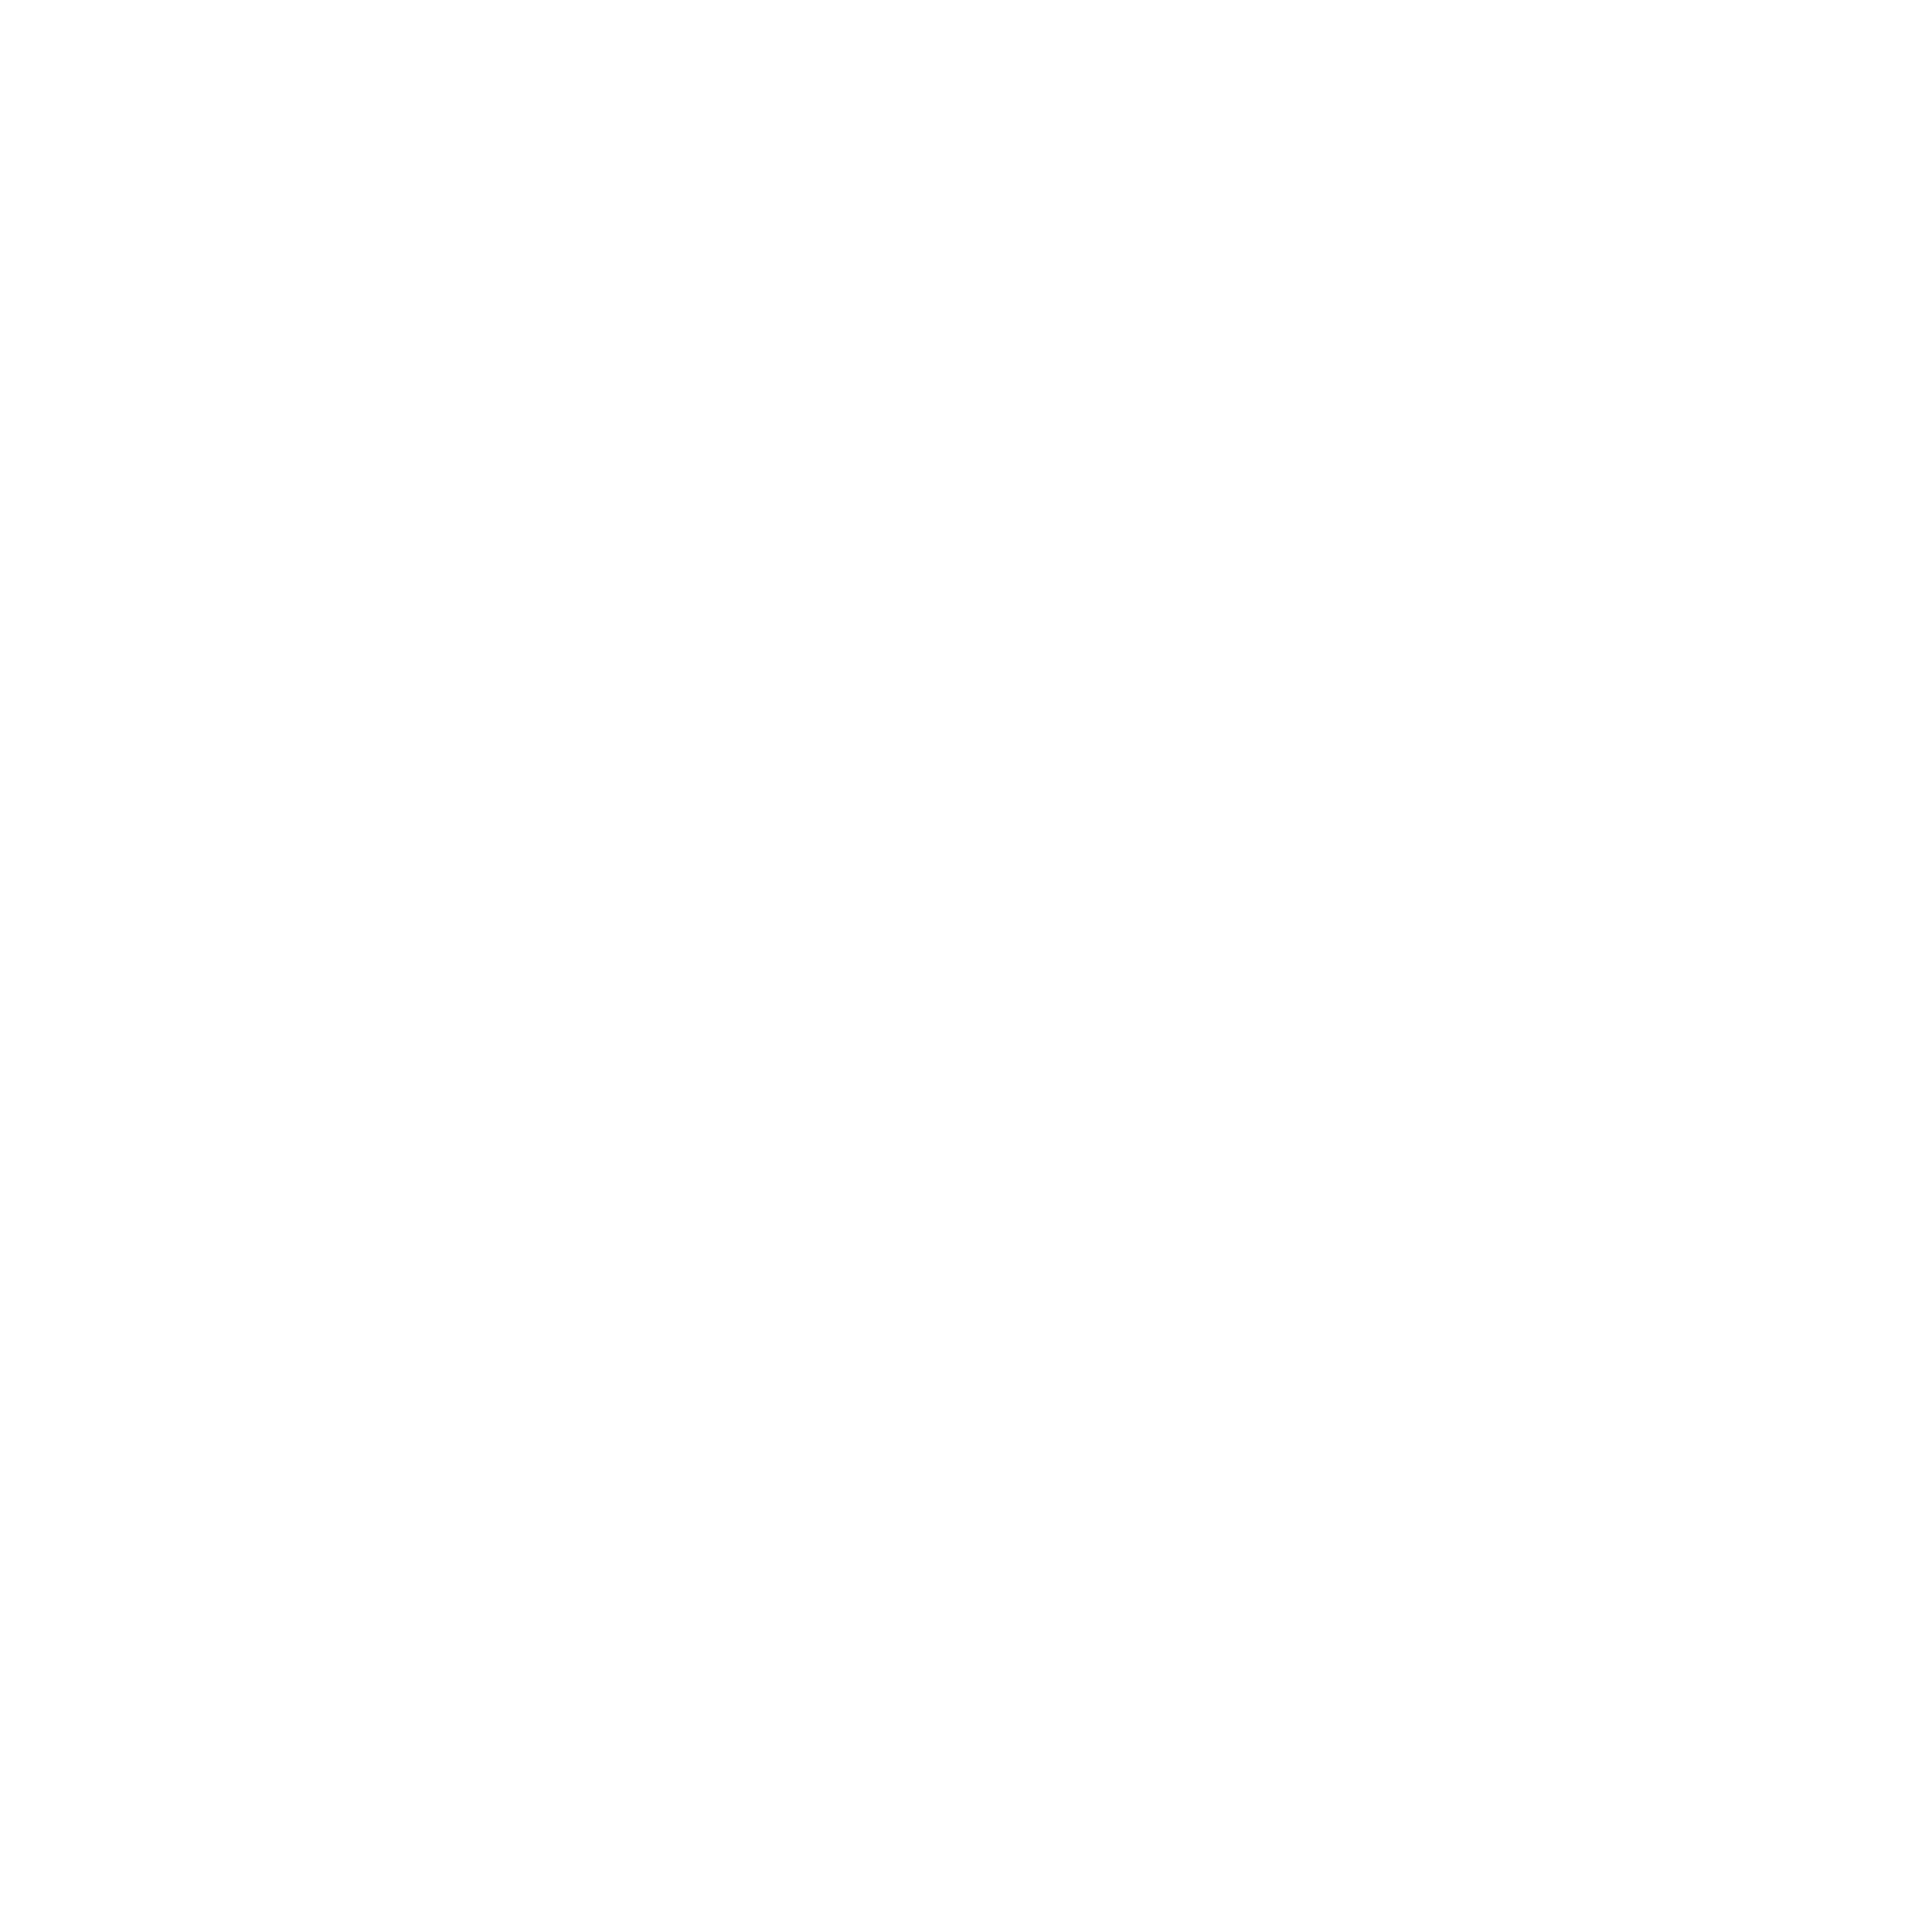

In [1031]:
output_image = Image.new("RGB", (IMAGE_WIDTH, IMAGE_HEIGHT), "white")
output_image

In [1032]:
output_draw = ImageDraw.Draw(output_image)

In [1033]:
output_font = ImageFont.truetype(STANDARD_FONT, FONT_SIZE)
output_draw.fontmode = "1"

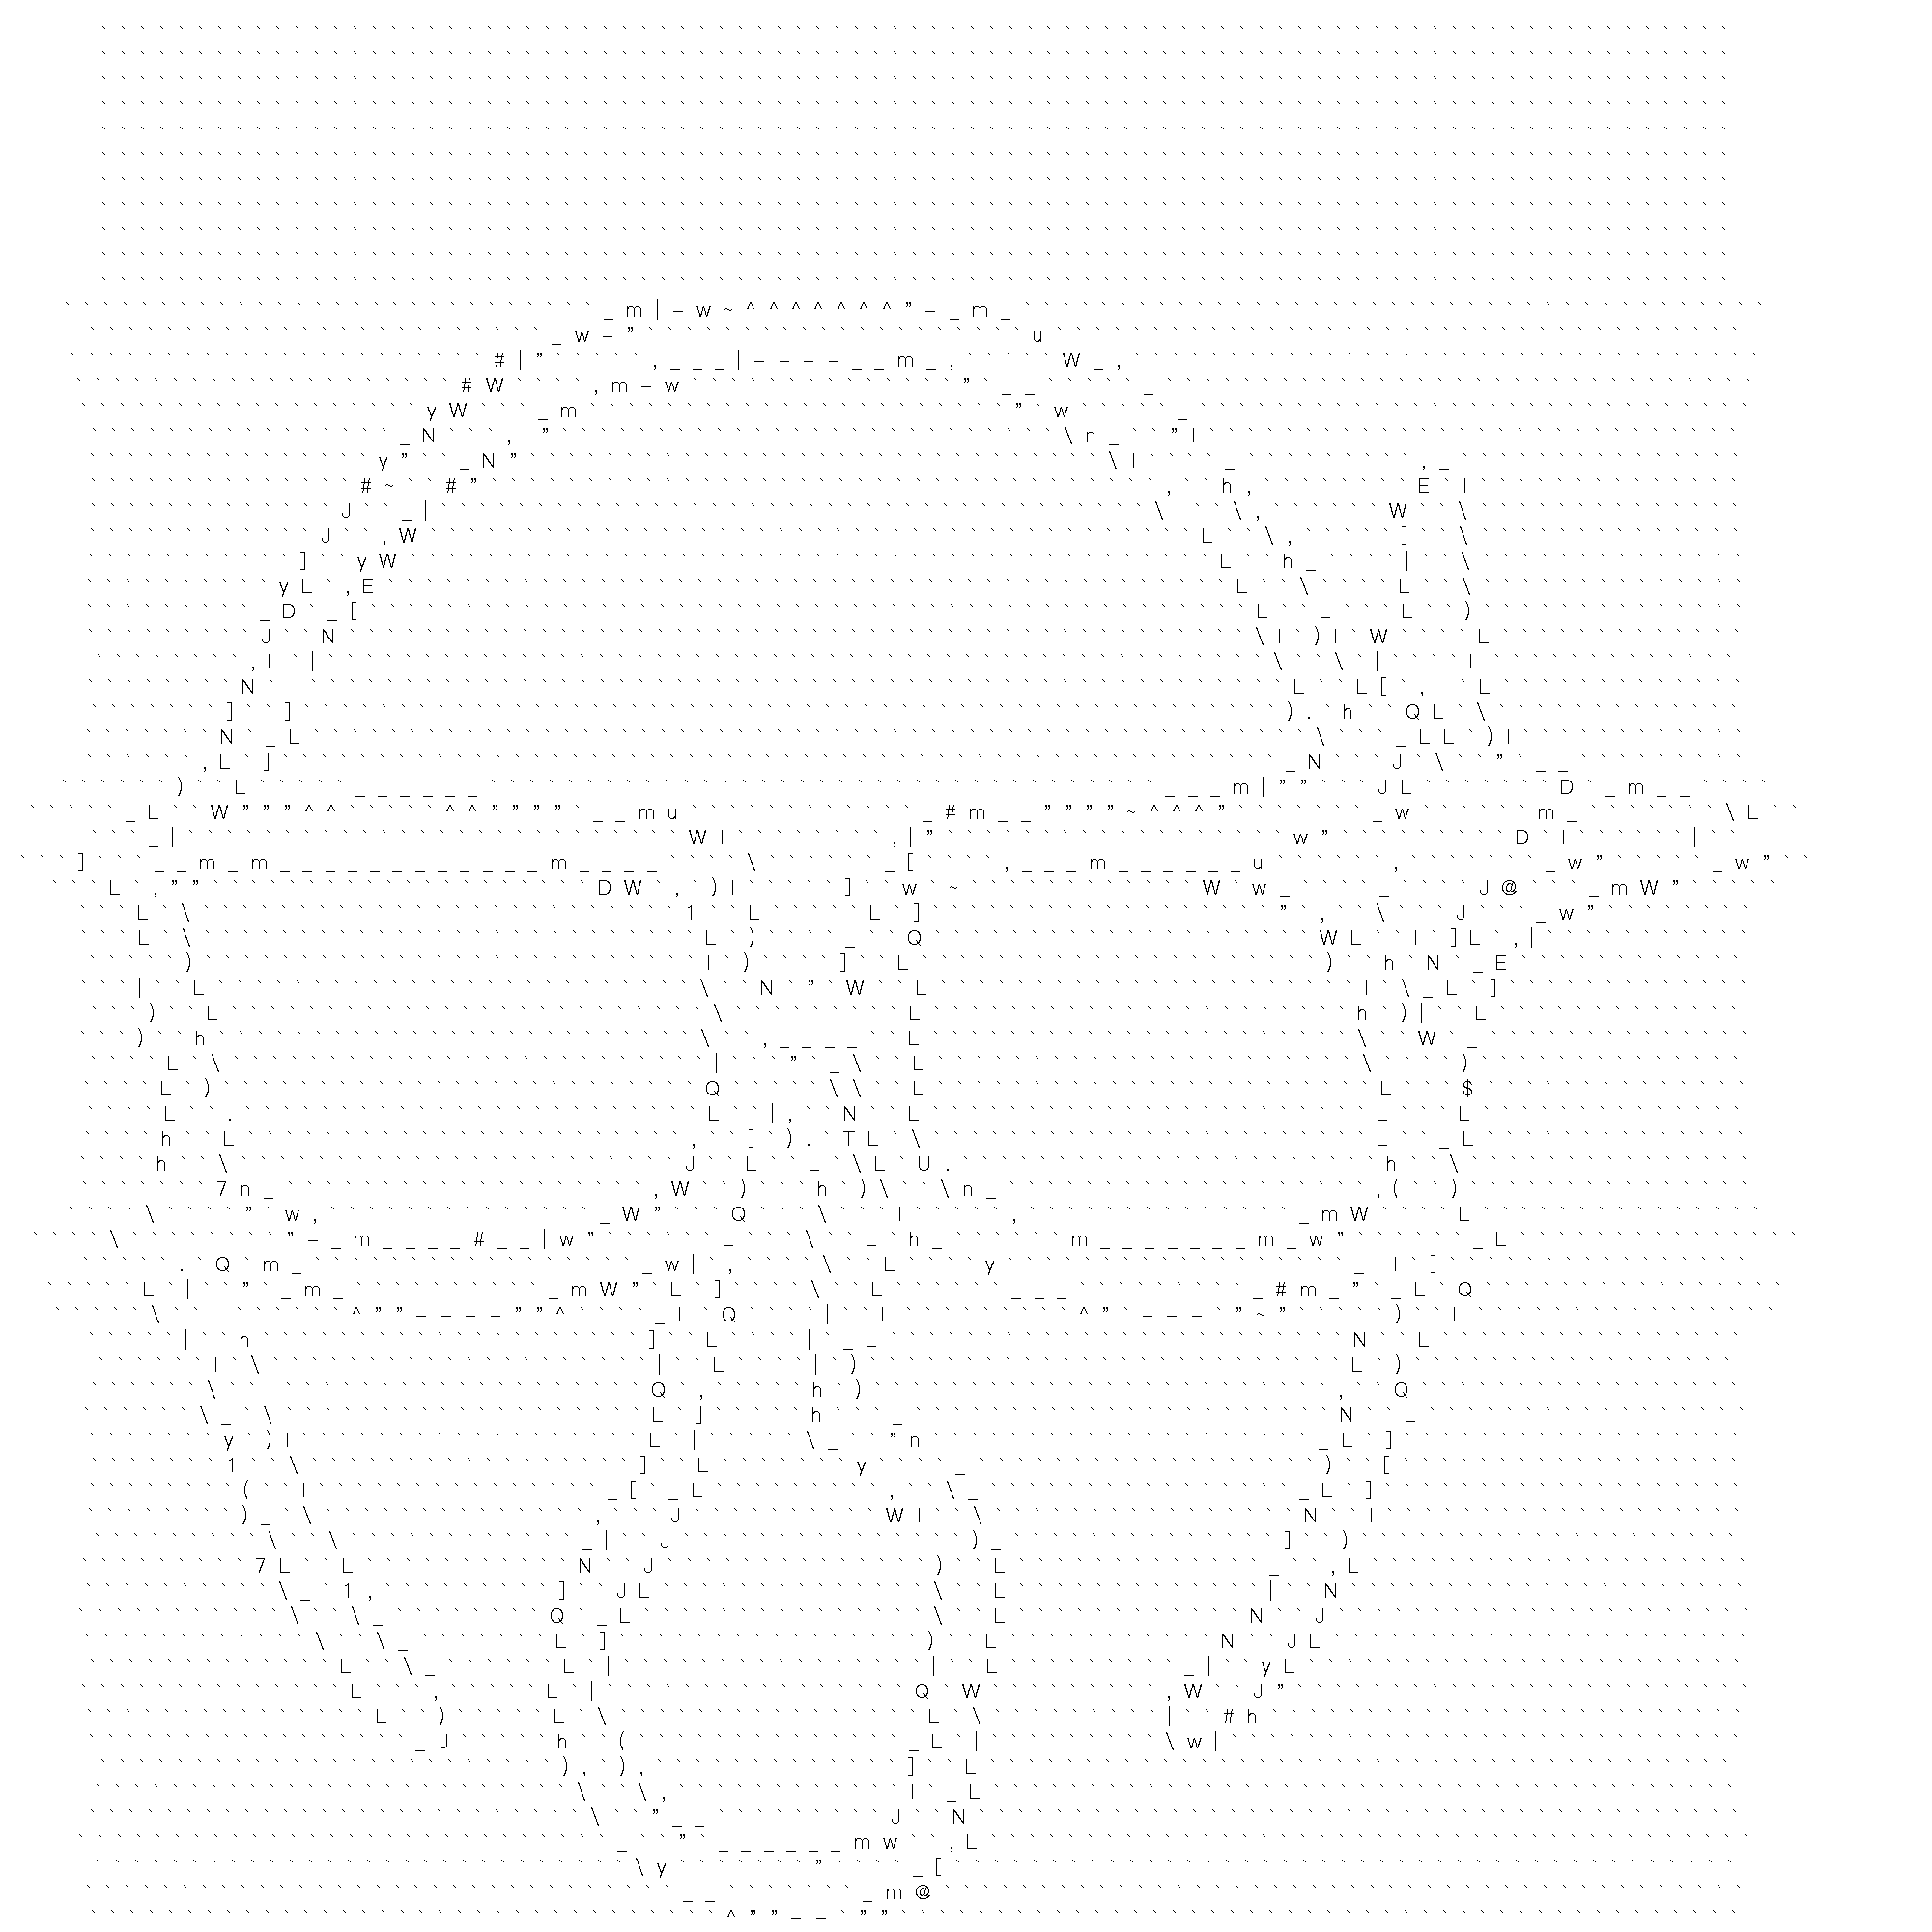

In [1034]:
output_draw.text(TEXT_POSITION, combine_multi_string, font=output_font, fill="black", align = 'center')
output_image

----

In [1035]:
gray_image = part_array[5,5,:,:]

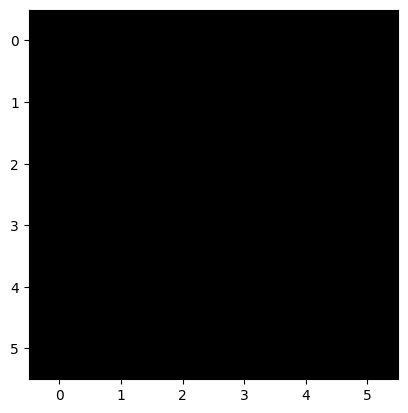

In [1036]:
plt.imshow(gray_image, cmap="gray")

In [1037]:
zoom_factor = 5

In [1038]:
zoomed_image = zoom(gray_image, zoom_factor)

In [1039]:
zoomed_image = np.clip(zoomed_image,0,255).astype(np.uint8)
zoomed_image.shape

(30, 30)

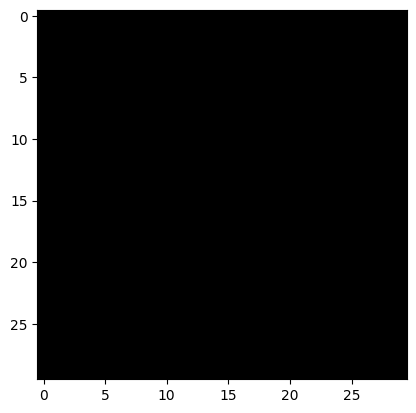

In [1040]:
plt.imshow(zoomed_image,cmap='gray')